## Image Classification (CNN)

In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


In [12]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [13]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [14]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### Data Visualization

[3]


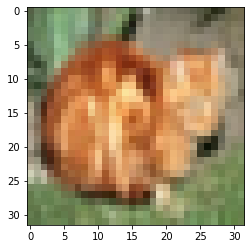

In [16]:
plt.imshow(X_train[1100]) ## imshow is to visualize images(imshow( I ) displays the grayscale image I in a figure)
print(y_train[1100])

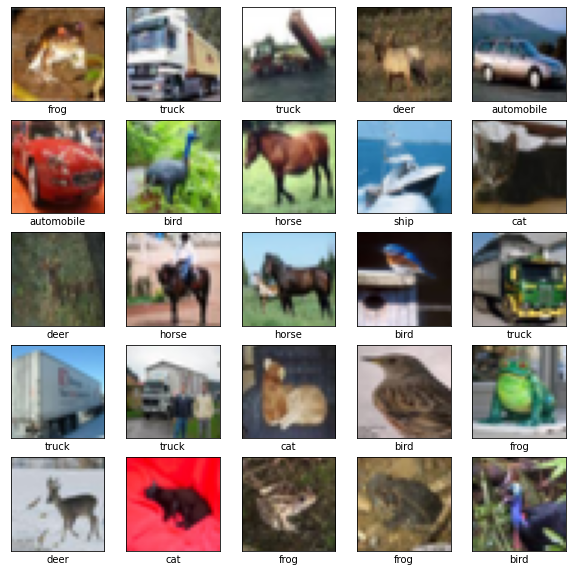

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

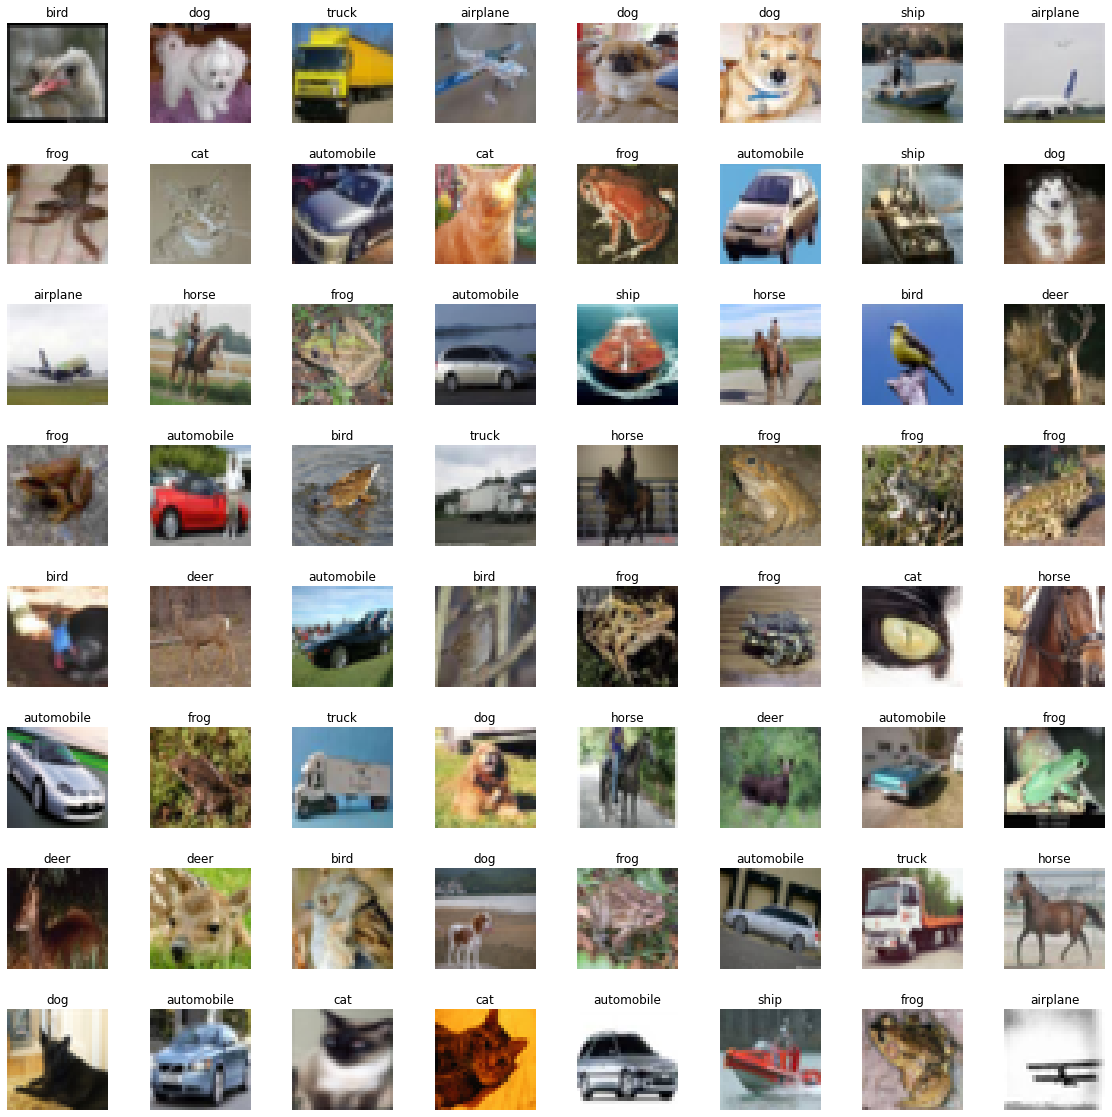

In [18]:
fig,axes = plt.subplots(8,8,figsize = (20,20))
axes = axes.ravel();

for i in np.arange(0,64):
    index_num = np.random.randint(0,50000)
    axes[i].imshow(X_train[index_num])
    axes[i].set_title(class_names[y_train[index_num][0]])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Data Preprocessing

In [19]:
## Normalizing the pixel values between 0 to 1 by deviding it by 255
X_train,X_test = X_train/255.0,X_test/255.0

In [20]:
import tensorflow
y_train = tensorflow.keras.utils.to_categorical(y_train,10)
y_test = tensorflow.keras.utils.to_categorical(y_test,10)

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
X_train.shape[1:]  ## this is shape of input images (32 * 32 pixel color image so 3 )

(32, 32, 3)

In [23]:
X_train.shape[3] ## for RBG  image 

3

In [24]:
y_train.shape

(50000, 10)

In [25]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating Convolutional base

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
## keras documentation

stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)



In [28]:
stopping_1 = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=False,start_from_epoch=0)

In [29]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu',input_shape=(32,32,3)))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D( 64,  (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (Average  (None, 15, 15, 32)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 64)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [31]:

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax')) # output layer 

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (Average  (None, 15, 15, 32)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 64)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

## Compile And Train model

In [33]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [34]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size= 50,epochs = 100,callbacks= [stopping_1])

Epoch 1/100
670/670 [==============================] - 81s 117ms/step - loss: 1.8711 - accuracy: 0.2964 - val_loss: 1.6014 - val_accuracy: 0.4100
Epoch 2/100
670/670 [==============================] - 59s 89ms/step - loss: 1.5312 - accuracy: 0.4355 - val_loss: 1.4449 - val_accuracy: 0.4736
Epoch 3/100
670/670 [==============================] - 48s 72ms/step - loss: 1.3965 - accuracy: 0.4908 - val_loss: 1.2909 - val_accuracy: 0.5361
Epoch 4/100
670/670 [==============================] - 103s 154ms/step - loss: 1.3087 - accuracy: 0.5257 - val_loss: 1.2005 - val_accuracy: 0.5717
Epoch 5/100
670/670 [==============================] - 62s 92ms/step - loss: 1.2483 - accuracy: 0.5504 - val_loss: 1.1673 - val_accuracy: 0.5848
Epoch 6/100
670/670 [==============================] - 55s 82ms/step - loss: 1.1992 - accuracy: 0.5679 - val_loss: 1.1286 - val_accuracy: 0.5985
Epoch 7/100
670/670 [==============================] - 55s 82ms/step - loss: 1.1559 - accuracy: 0.5866 - val_loss: 1.1059 - val

### Model Evaluation 

In [35]:
print("Test Loss and Test Accuracy: {}".format(model.evaluate(X_test,y_test)))

313/313 [==============================] - 4s 12ms/step - loss: 0.8700 - accuracy: 0.6932
Test Loss and Test Accuracy: [0.8700443506240845, 0.6931999921798706]


In [36]:
pred_class=model.predict(X_test) 
#classes_x=np.argmax(pred_class,axis=1)

#pred_class = model.predict_classes(X_test)
#pred_class

313/313 [==============================] - 4s 11ms/step


In [37]:
pred_class

array([[1.1769269e-02, 7.4566988e-04, 2.0960221e-02, ..., 1.5874045e-02,
        6.8965182e-02, 1.2612927e-03],
       [7.2609554e-03, 1.7628606e-02, 1.5953032e-05, ..., 4.5673519e-06,
        9.7372150e-01, 1.3522438e-03],
       [6.5431863e-02, 1.2998022e-01, 1.6537636e-03, ..., 5.4430694e-04,
        7.5919408e-01, 3.4371842e-02],
       ...,
       [2.4183475e-05, 7.2972316e-06, 1.1783523e-02, ..., 1.7504415e-02,
        2.2526702e-04, 6.7757959e-05],
       [6.3196540e-02, 8.4592855e-01, 6.6461773e-03, ..., 3.6679655e-03,
        2.8234278e-03, 1.5623962e-02],
       [2.3663790e-06, 1.8419581e-07, 4.8841635e-04, ..., 9.1156131e-01,
        4.0449854e-07, 2.8165275e-06]], dtype=float32)

In [38]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [39]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [40]:
pred_class = pred_class.argmax(1)
pred_class

array([3, 8, 8, ..., 5, 1, 7])

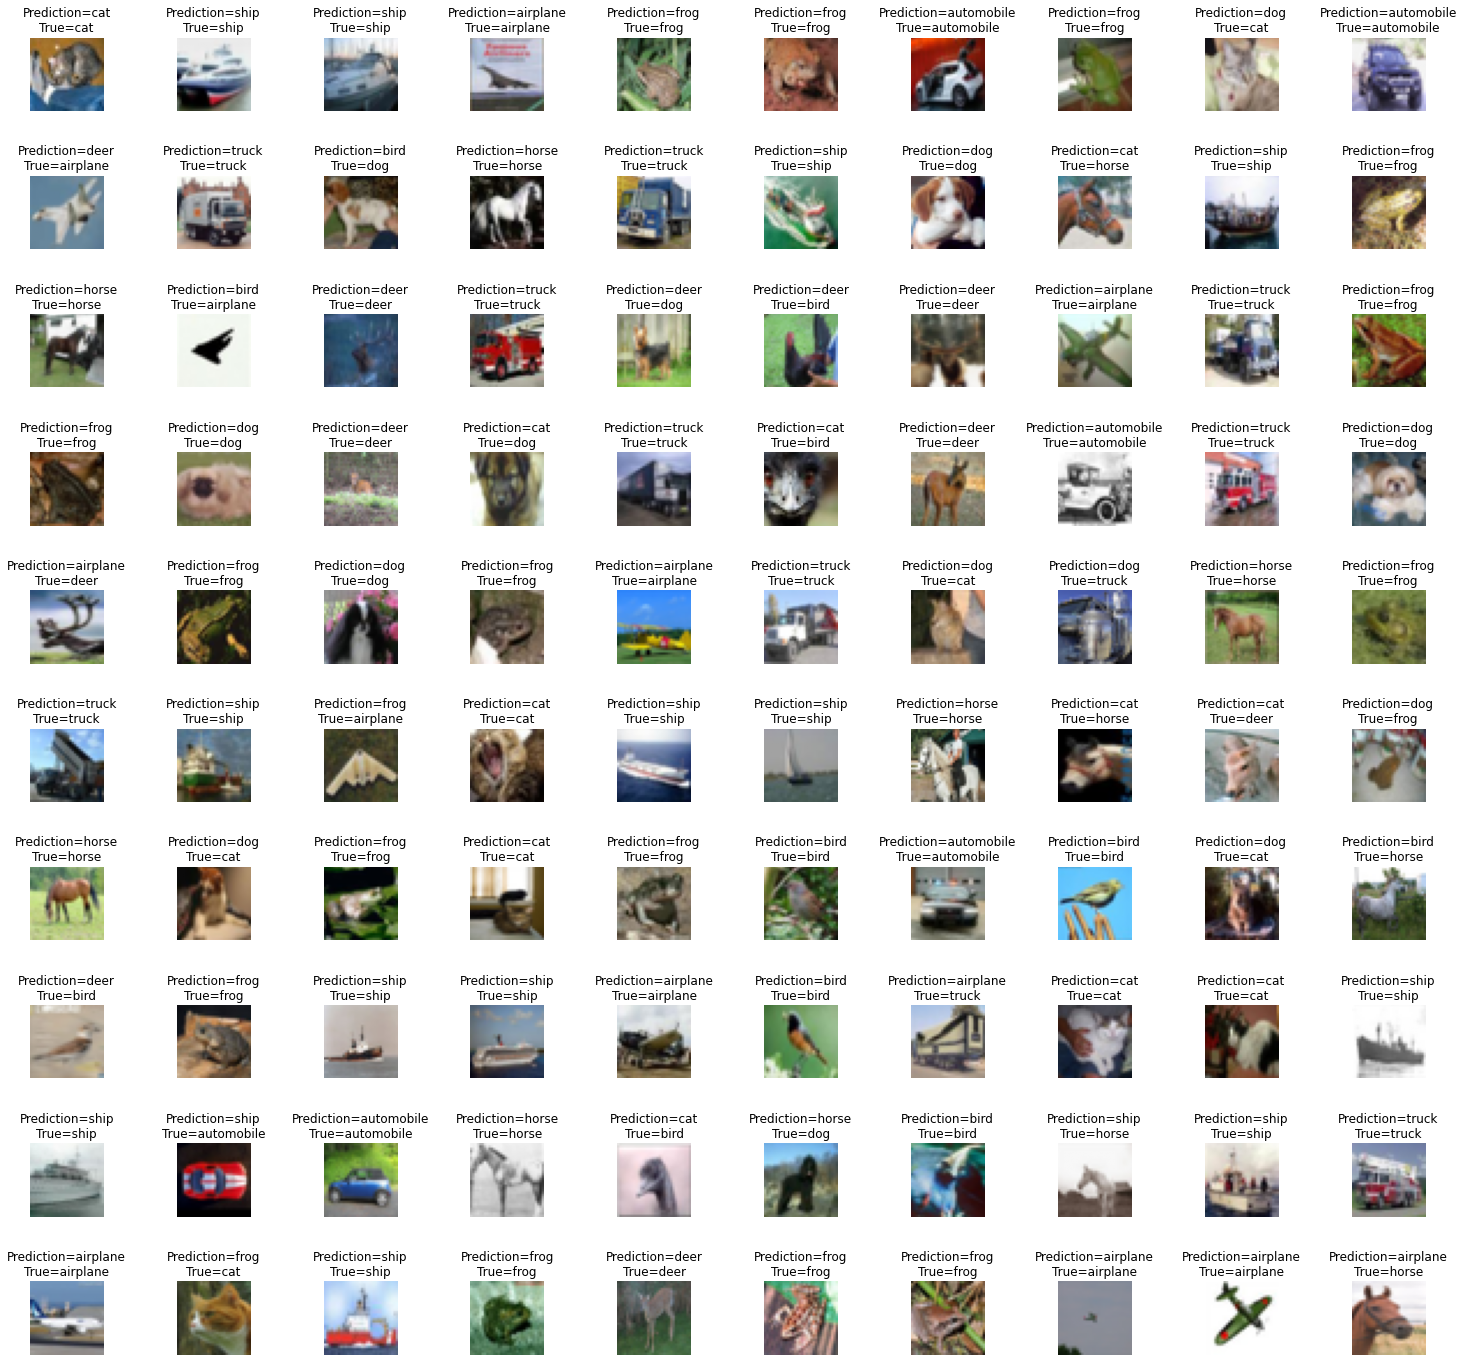

In [41]:
fig,axes = plt.subplots(10,10,figsize = (25,25))
axes = axes.ravel();

for i in np.arange(0,100):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\nTrue={}".format(class_names[pred_class[i]],class_names[y_test[i]]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)


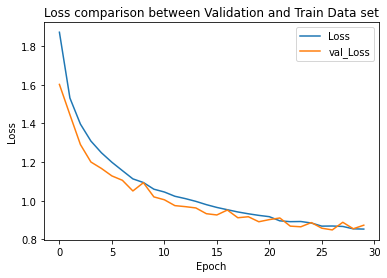

In [42]:
plt.plot(model_history.history['loss'],label ='Loss')
plt.plot(model_history.history['val_loss'],label = 'val_Loss')
plt.title('Loss comparison between Validation and Train Data set')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

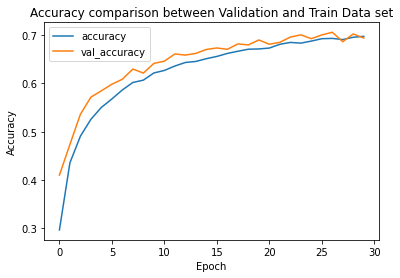

In [43]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

cm = confusion_matrix(y_test,pred_class)
cm


array([[681,  20,  46,  28,  24,   4,  24,   6, 134,  33],
       [ 21, 795,   5,   9,   3,   4,  22,   3,  57,  81],
       [ 56,   3, 506,  68, 153,  69, 107,  17,  16,   5],
       [ 13,   5,  71, 461,  88, 190, 119,  26,  17,  10],
       [ 10,   2,  43,  61, 694,  36,  79,  55,  17,   3],
       [  6,   1,  58, 161,  61, 622,  52,  27,   8,   4],
       [  2,   2,  37,  35,  54,  13, 852,   1,   3,   1],
       [  9,   0,  35,  60,  95,  97,  19, 667,   6,  12],
       [ 32,  18,  10,  13,  12,   4,  13,   2, 879,  17],
       [ 23,  53,  13,  26,   9,  10,  22,   9,  60, 775]])

In [45]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74      1000
           1       0.88      0.80      0.84      1000
           2       0.61      0.51      0.55      1000
           3       0.50      0.46      0.48      1000
           4       0.58      0.69      0.63      1000
           5       0.59      0.62      0.61      1000
           6       0.65      0.85      0.74      1000
           7       0.82      0.67      0.74      1000
           8       0.73      0.88      0.80      1000
           9       0.82      0.78      0.80      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [46]:
print(accuracy_score(y_test,pred_class))

0.6932
